Loading clip data from: female_speech\clip
Loading frame data from: female_speech\frame
Loading clip data from: male_speech\clip
Loading frame data from: male_speech\frame
Loading clip data from: music\clip
Loading frame data from: music\frame


C:\Users\Zosia\AppData\Local\Temp\ipykernel_25148\1714583982.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y=feature, data=data, order=['female_speech', 'male_speech', 'music'], palette=colors, alpha=0.6)


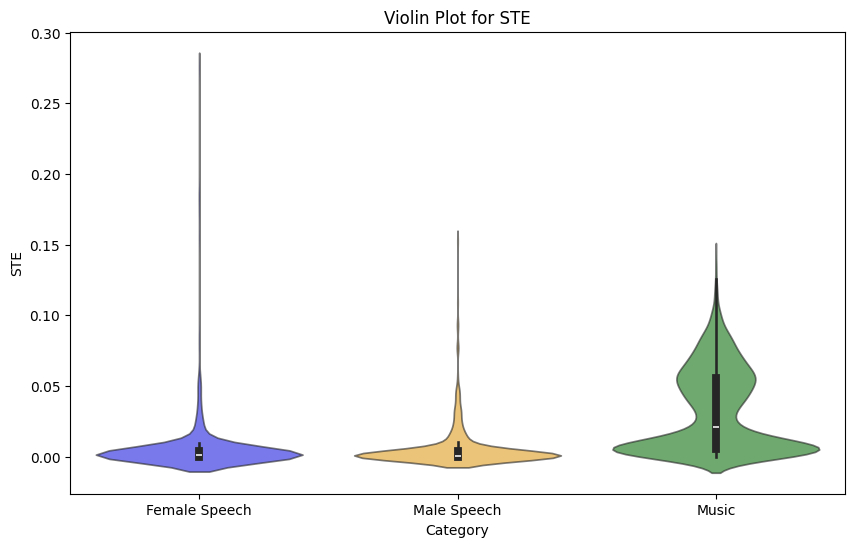

C:\Users\Zosia\AppData\Local\Temp\ipykernel_25148\1714583982.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y=feature, data=data, order=['female_speech', 'male_speech', 'music'], palette=colors, alpha=0.6)


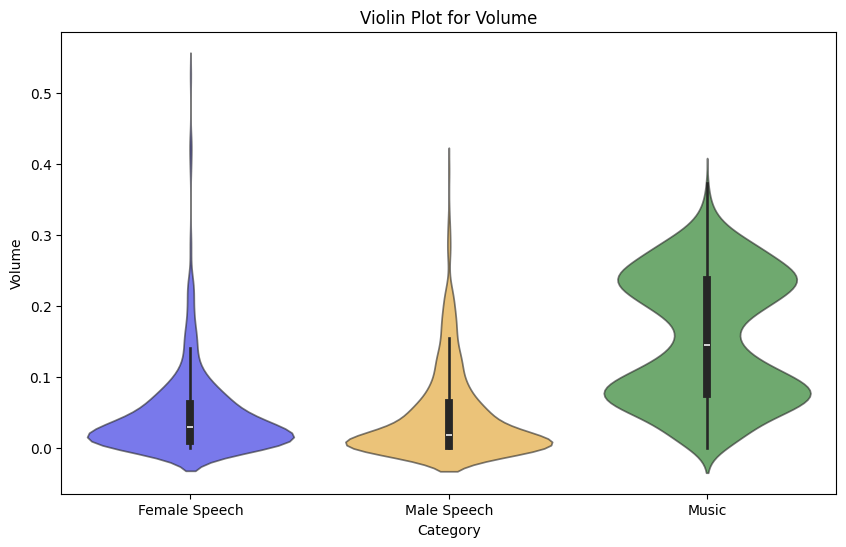

C:\Users\Zosia\AppData\Local\Temp\ipykernel_25148\1714583982.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y=feature, data=data, order=['female_speech', 'male_speech', 'music'], palette=colors, alpha=0.6)


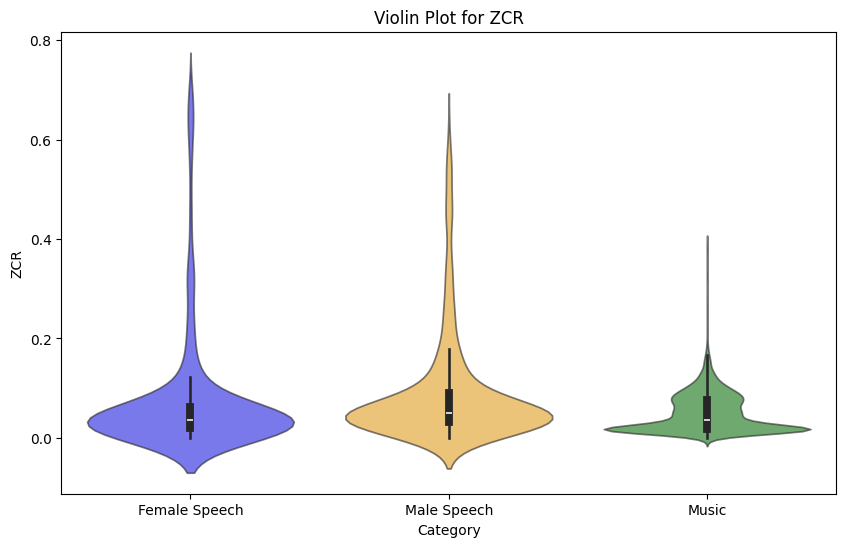

C:\Users\Zosia\AppData\Local\Temp\ipykernel_25148\1714583982.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y=feature, data=data1, order=['female_speech', 'male_speech', 'music'], palette=colors, alpha=0.6)


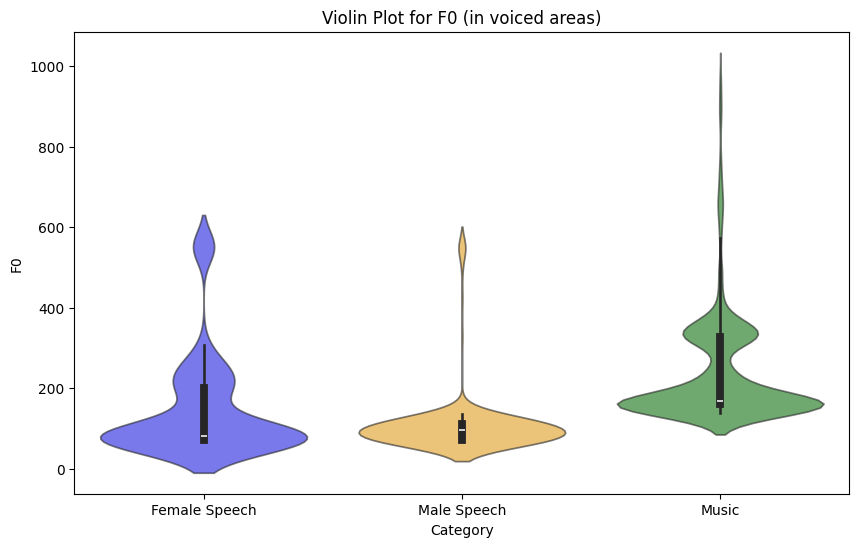

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Function to load all CSV files from a directory
def load_csv_files_from_directory(directory):
    all_data = []
    # Check if the directory exists
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist!")
        return pd.DataFrame()  # Return an empty DataFrame if the directory doesn't exist
    
    # Loop through all CSV files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            # Load the CSV file and append to the list
            df = pd.read_csv(file_path)
            all_data.append(df)
    
    # Combine all dataframes into one
    combined_df = pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()
    return combined_df

# Folder paths for your dataset
female_speech_path = "female_speech"
male_speech_path = "male_speech"
music_path = "music"

# Load clip and frame data for each category (female_speech, male_speech, music)
def load_data():
    categories = ['female_speech', 'male_speech', 'music']
    clip_data = {}
    frame_data = {}
    
    for category in categories:
        # Get the correct path for clip and frame directories
        clip_dir = os.path.join(globals()[f'{category}_path'], 'clip')
        frame_dir = os.path.join(globals()[f'{category}_path'], 'frame')
        
        print(f"Loading clip data from: {clip_dir}")
        print(f"Loading frame data from: {frame_dir}")
        
        # Load data from clip and frame directories
        clip_data[category] = load_csv_files_from_directory(clip_dir)
        frame_data[category] = load_csv_files_from_directory(frame_dir)
    
    return clip_data, frame_data

# Feature columns for box plot
clip_features = ['VSTD', 'VDR', 'VU', 'LSTER', 'Energy_Entropy', 'ZSTD', 'HZCRR']
frame_features = ['STE', 'Volume', 'ZCR', 'F0']
f0_features = ['F0']
#filter out f0 features that have voiced ratio = 0
def filter_f0_features(data):
    return data[data['Voiced Ratio'] > 0]


# Function to plot boxplots for given features
def plot_boxplots(data, features):
    colors = ['blue', 'orange', 'green']
    for feature in features:
        if feature in f0_features:
            data1 = filter_f0_features(data)
            plt.figure(figsize=(10, 6))  # Increase the figure size
            sns.violinplot(x='Category', y=feature, data=data1, order=['female_speech', 'male_speech', 'music'], palette=colors, alpha=0.6)
            plt.title(f'Violin Plot for {feature} (in voiced areas)')
            plt.xticks([0, 1, 2], ['Female Speech', 'Male Speech', 'Music'])
            plt.xlabel('Category')
            plt.ylabel(feature)
            plt.show()
        else:
            plt.figure(figsize=(10, 6))  # Increase the figure size
            sns.violinplot(x='Category', y=feature, data=data, order=['female_speech', 'male_speech', 'music'], palette=colors, alpha=0.6)
            plt.title(f'Violin Plot for {feature}')
            plt.xticks([0, 1, 2], ['Female Speech', 'Male Speech', 'Music'])
            plt.xlabel('Category')
            plt.ylabel(feature)
            plt.show()

# Create DataFrame for combined plotting
def create_combined_data(clip_data, frame_data):
    combined_data = pd.DataFrame()
    # Combine frame data
    for category in ['female_speech', 'male_speech', 'music']:
        frame_df = frame_data[category].copy()
        frame_df['Category'] = category  # Add the category column
        combined_data = pd.concat([combined_data, frame_df], ignore_index=True)

    # Now create the box plots
    plot_boxplots(combined_data, frame_features)

# Load data and plot
clip_data, frame_data = load_data()

# Only proceed if data was successfully loaded
if clip_data and frame_data:
    create_combined_data(clip_data, frame_data)
else:
    print("Data loading failed, check directory paths.")

In [8]:
def extract_statistics(clip_data, features):
    stats = {}
    
    for category in ['female_speech', 'male_speech', 'music']:
        df = clip_data[category]
        category_stats = {}
        
        for feature in features:
            mean_value = df[feature].mean() if feature in df.columns else None
            median_value = df[feature].median() if feature in df.columns else None
            percentile_25 = df[feature].quantile(0.25) if feature in df.columns else None

            category_stats[feature] = {
                'mean': mean_value,
                'median': median_value,
                '25th_percentile': percentile_25
            }
        stats[category] = category_stats
    
    return stats

clip_features = ['LSTER', 'HZCRR', 'ZSTD']
stats = extract_statistics(clip_data, clip_features)

for category, category_stats in stats.items():
    print(f"\nStatistics for {category}:")
    for feature, feature_stats in category_stats.items():
        print(f"{feature} - Mean: {feature_stats['mean']}, Median: {feature_stats['median']}, 25th Percentile: {feature_stats['25th_percentile']}")



Statistics for female_speech:
LSTER - Mean: 0.5560340514902822, Median: 0.56, 25th Percentile: 0.48
HZCRR - Mean: 0.17746870978947477, Median: 0.16, 25th Percentile: 0.12
ZSTD - Mean: 0.0973378507638632, Median: 0.0590881769915925, 25th Percentile: 0.043956139651363

Statistics for male_speech:
LSTER - Mean: 0.5277178597914618, Median: 0.56, 25th Percentile: 0.4422222222222222
HZCRR - Mean: 0.1781542423631208, Median: 0.1666666666666666, 25th Percentile: 0.14
ZSTD - Mean: 0.08680431240429679, Median: 0.0684210919252938, 25th Percentile: 0.04787074389776795

Statistics for music:
LSTER - Mean: 0.14516307893020222, Median: 0.08, 25th Percentile: 0.0
HZCRR - Mean: 0.04922700587084149, Median: 0.04, 25th Percentile: 0.0
ZSTD - Mean: 0.01644733128493234, Median: 0.009964551105560649, 25th Percentile: 0.004627585542244876


used to establish thresholds for music speech recognition


In [9]:
def extract_statistics_for_combined_groups(clip_data, features):
    stats = {}
    
    speech_data = pd.concat([clip_data['female_speech'], clip_data['male_speech']], ignore_index=True)
    for category, data in [('speech', speech_data), ('music', clip_data['music'])]:
        category_stats = {}
        
        for feature in features:
            mean_value = data[feature].mean() if feature in data.columns else None
            median_value = data[feature].median() if feature in data.columns else None
            percentile_25 = data[feature].quantile(0.25) if feature in data.columns else None
            category_stats[feature] = {
                'mean': mean_value,
                'median': median_value,
                '25th_percentile': percentile_25
            }
        stats[category] = category_stats
    
    return stats

clip_features = ['LSTER', 'HZCRR', 'ZSTD']

stats = extract_statistics_for_combined_groups(clip_data, clip_features)
for category, category_stats in stats.items():
    print(f"\nStatistics for {category}:")
    for feature, feature_stats in category_stats.items():
        print(f"{feature} - Mean: {feature_stats['mean']}, Median: {feature_stats['median']}, 25th Percentile: {feature_stats['25th_percentile']}")



Statistics for speech:
LSTER - Mean: 0.5413314134928178, Median: 0.56, 25th Percentile: 0.46
HZCRR - Mean: 0.17782465939502176, Median: 0.1633333333333333, 25th Percentile: 0.1376086956521739
ZSTD - Mean: 0.0918685135387037, Median: 0.06804690687051246, 25th Percentile: 0.044693222038113475

Statistics for music:
LSTER - Mean: 0.14516307893020222, Median: 0.08, 25th Percentile: 0.0
HZCRR - Mean: 0.04922700587084149, Median: 0.04, 25th Percentile: 0.0
ZSTD - Mean: 0.01644733128493234, Median: 0.009964551105560649, 25th Percentile: 0.004627585542244876


Loading clip data from: female_speech\clip
Loading frame data from: female_speech\frame
Loading clip data from: male_speech\clip
Loading frame data from: male_speech\frame
Loading clip data from: music\clip
Loading frame data from: music\frame


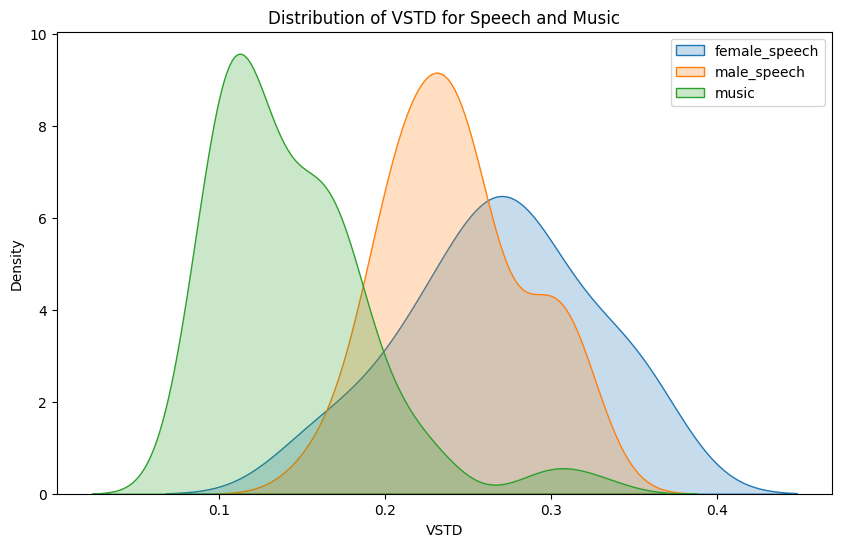

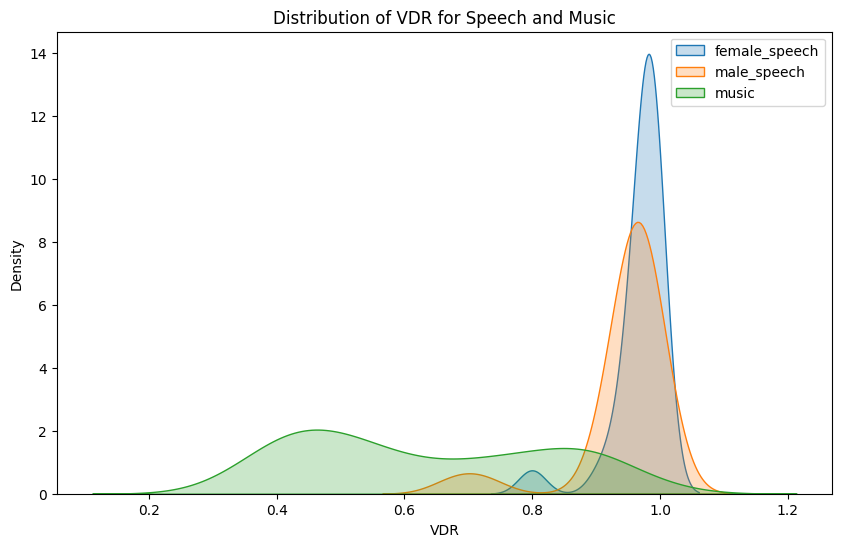

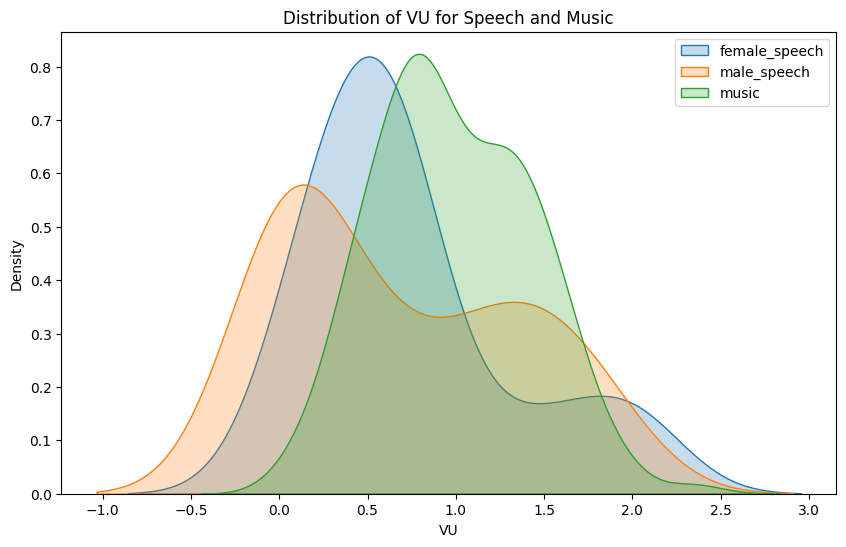

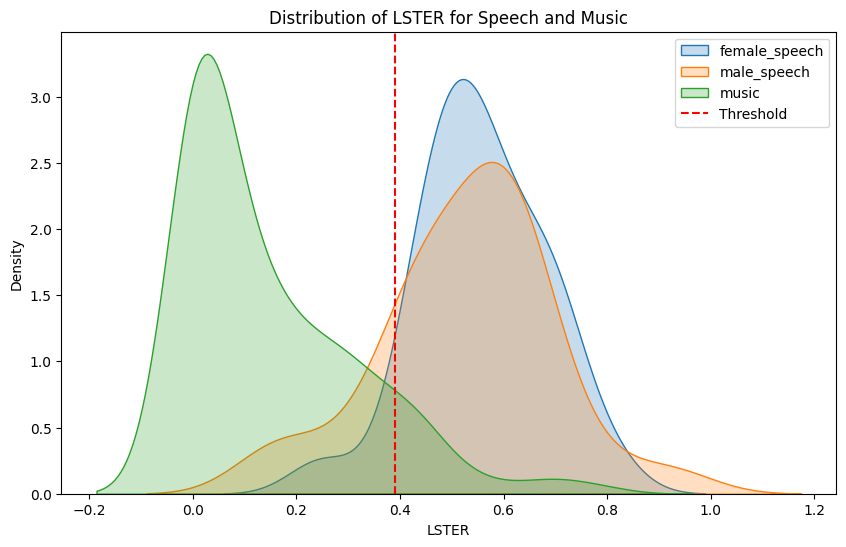

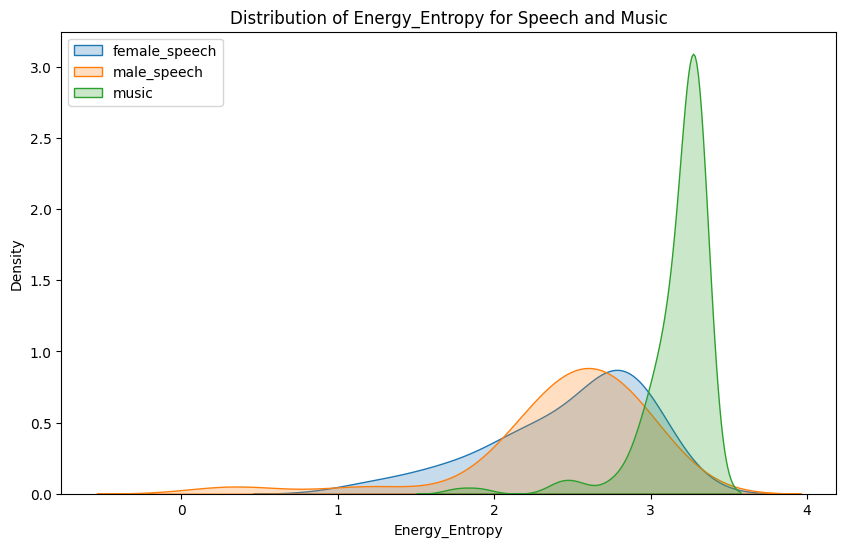

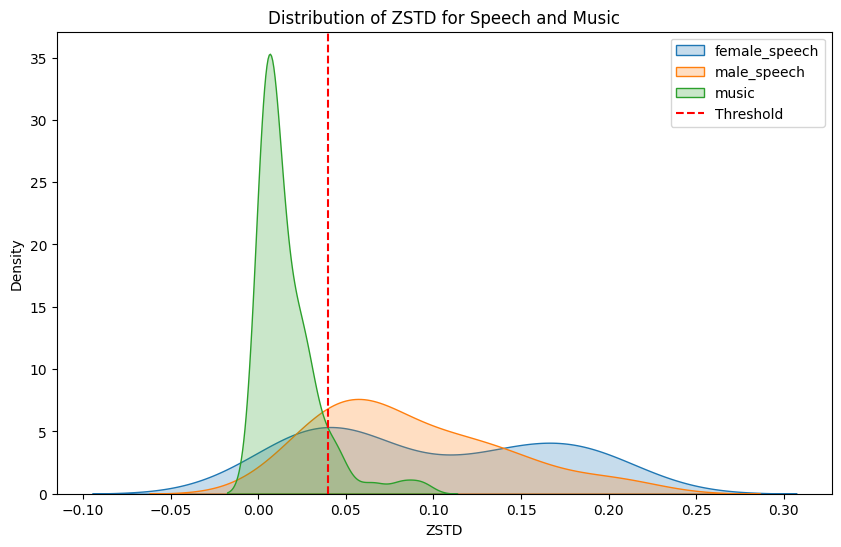

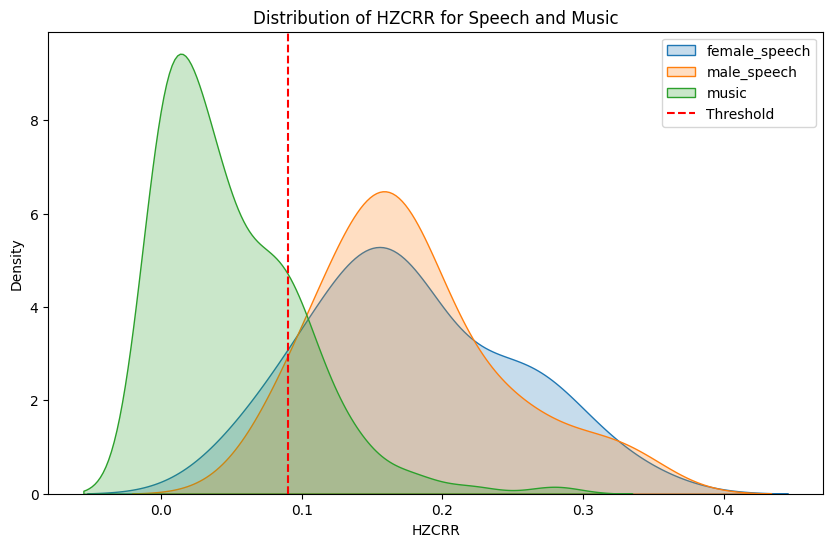

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
clip_features = ['VSTD', 'VDR', 'VU', 'LSTER', 'Energy_Entropy', 'ZSTD', 'HZCRR']

def visualize_feature_distributions(clip_data):
    categories = ['female_speech', 'male_speech', 'music']
    
    
    for feature in clip_features:
        plt.figure(figsize=(10, 6))
        for category in categories:
            sns.kdeplot(clip_data[category][feature], label=category, fill=True)
        # plot thresholds 
        if feature == 'LSTER':
            plt.axvline(x=0.39, color='r', linestyle='--', label='Threshold')
        if feature == 'HZCRR':
            plt.axvline(x=0.09, color='r', linestyle='--', label='Threshold')
        if feature == 'ZSTD':
            plt.axvline(x=0.04, color='r', linestyle='--', label='Threshold')
        
        plt.title(f'Distribution of {feature} for Speech and Music')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

clip_data, frame_data = load_data()
visualize_feature_distributions(clip_data)
